In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0,'../')
plt_style_dir = '../../stash/'
fig_exp_dir = '../../../figs/'
from ifo_configs import N_shot
from ifo_configs import mich_freq_resp as MICH
from ifo_configs import bode_amp, bode_ph
%matplotlib inline
if os.path.isdir(plt_style_dir) == True:
    plt.style.use(plt_style_dir + 'ppt2latexsubfig.mplstyle')
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
# Some parameters
cee = np.float64(299792458)
h_bar = (6.626e-34)/(2*np.pi)
OMEG = np.float64(2*np.pi*cee/(1064.0*1e-9))
L = np.float64(4000.0)
nu = np.arange(1, 1000000, 1)
PHI_0 = np.pi/2 #[rad]
P_IN = 125 #[W]

In [4]:
H = MICH(nu, L, PHI_0, P_IN, OMEG)

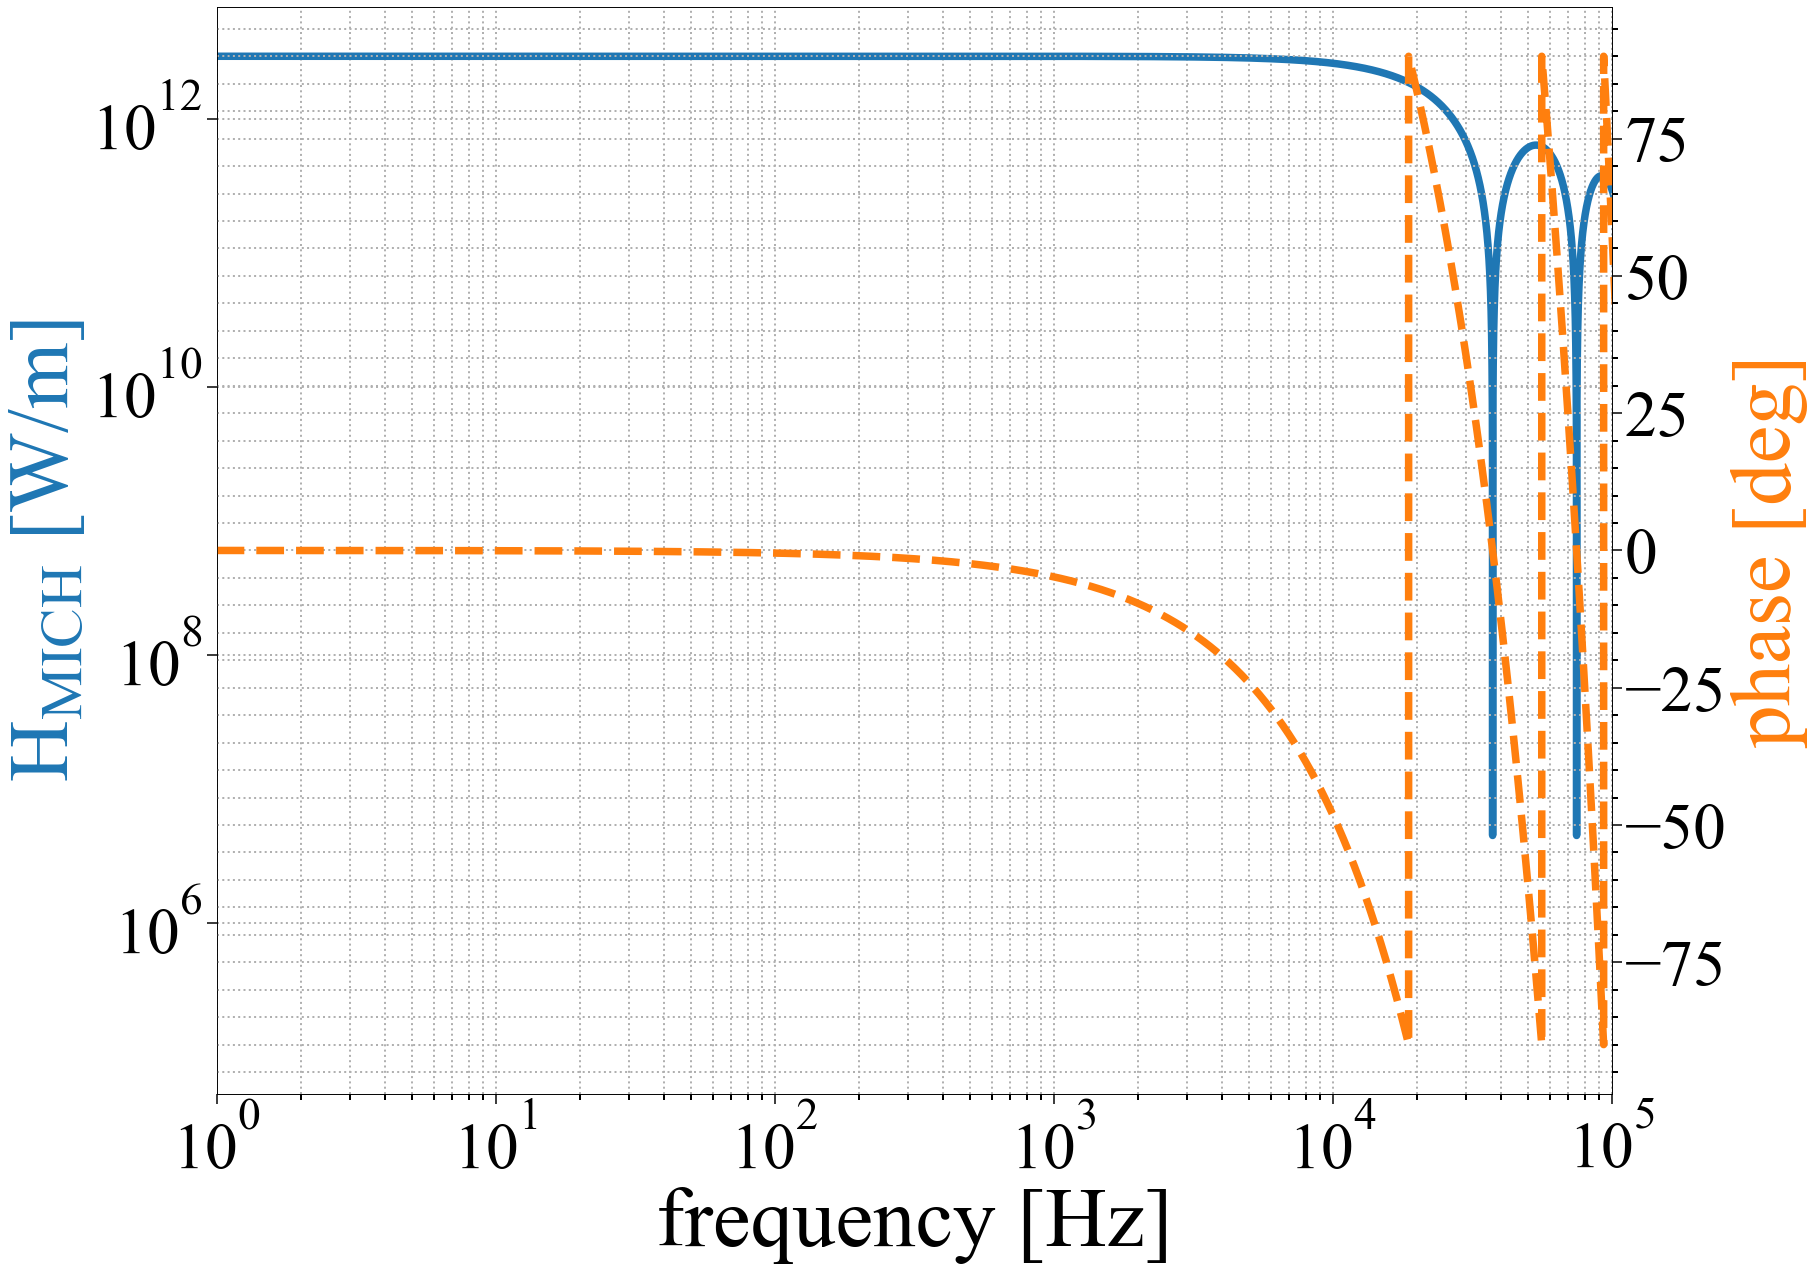

In [5]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel('H$_{\mathdefault{MICH}}$ [$\mathdefault{W/m}$]',color='C0')
#ax1.plot(w/(FSR), F_w_cc_modsq*100)
ax1.loglog(bode_amp(H),linewidth=7.5, color='C0')
#plt.ylim([10e-6, 10e0])
ax2 = ax1.twinx()
#ax2.plot(w/(FSR), (180/np.pi)*np.arctan(F_w_cc.imag/F_w_cc.real), '--')
ax2.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H)/np.real(H)), '--', linewidth=7.5,color='C1')
#plt.xlabel('frequency [FSR]')
plt.xlim([1,1e5])
plt.ylabel('phase [deg]',color='C1')
fig.savefig(fig_exp_dir + 'INTRO/mich_fr.pdf', dpi=300, bbox_inches='tight')

In [7]:
S_h = N_shot(OMEG, P_IN) 
print(S_h)

6.831801787605637e-09


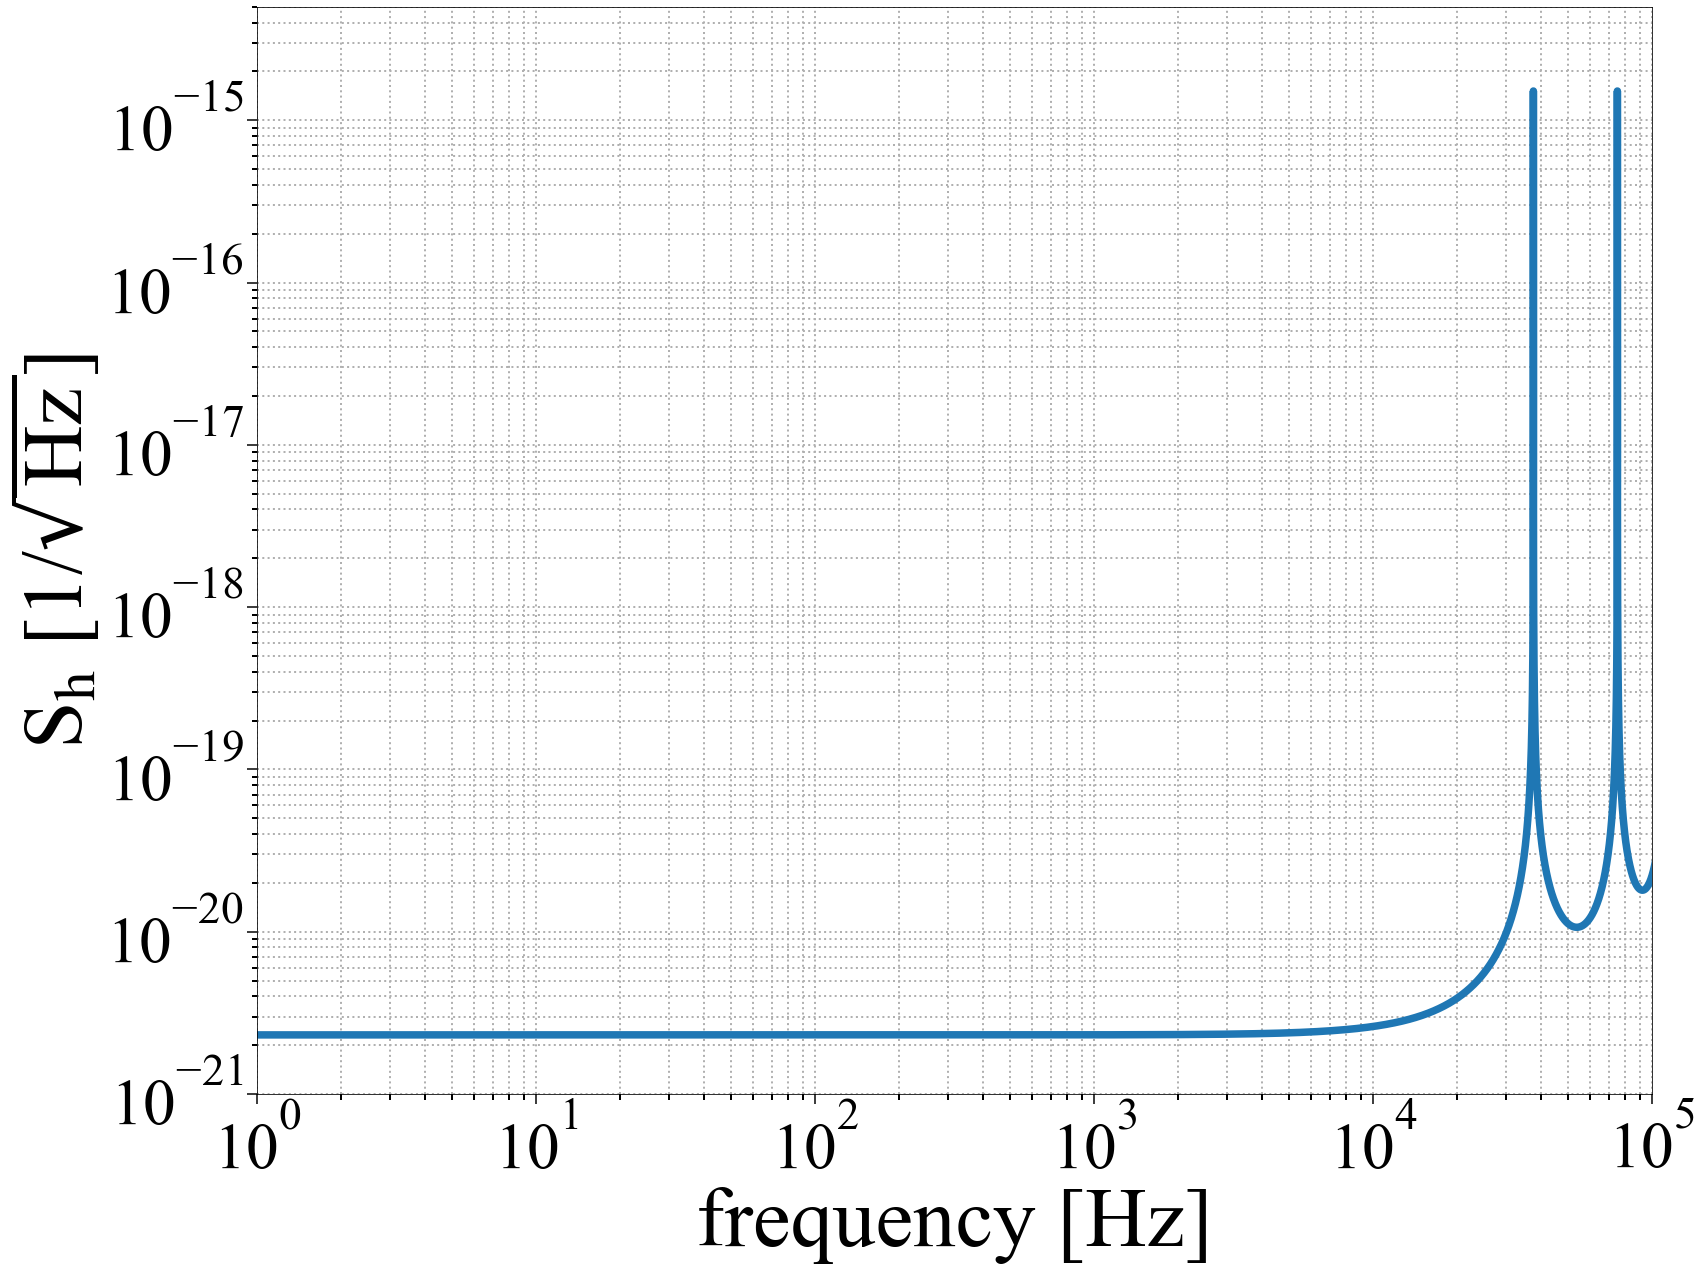

In [9]:
#ax1.plot(w/(FSR), F_w_cc_modsq*100)
plt.loglog(nu, S_h/bode_amp(H), linewidth=7.5, color='C0')
plt.ylim([1e-21, .5e-14])
plt.xlabel('frequency [Hz]')
plt.ylabel('$\mathdefault{S}_\mathdefault{h} \;  \mathdefault{[ 1 / \sqrt{\mathdefault{Hz}}]} $')
#ax2_ = ax1_.twinx()
#ax2.plot(w/(FSR), (180/np.pi)*np.arctan(F_w_cc.imag/F_w_cc.real), '--')
#ax2_.semilogx(nu,(180/np.pi)*np.arctan(np.imag(S_h)/np.real(S_h)), '--', linewidth=7.5,color='C1')
#plt.xlabel('frequency [FSR]')
plt.xlim([1,1e5])
plt.grid(visible=True)
#plt.subplots_adjust(hspace = 1)
#plt.ylabel('phase [deg]',color='C1')
#plt.tight_layout(rect=[0,0,1,1])
#plt.title('')
#plt.subplots_adjust(bottom=.1, top=.85) #, right=.8, left=.1)
plt.savefig(fig_exp_dir + 'INTRO/mich_sensi.pdf', dpi=300, bbox_inches='tight')